<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">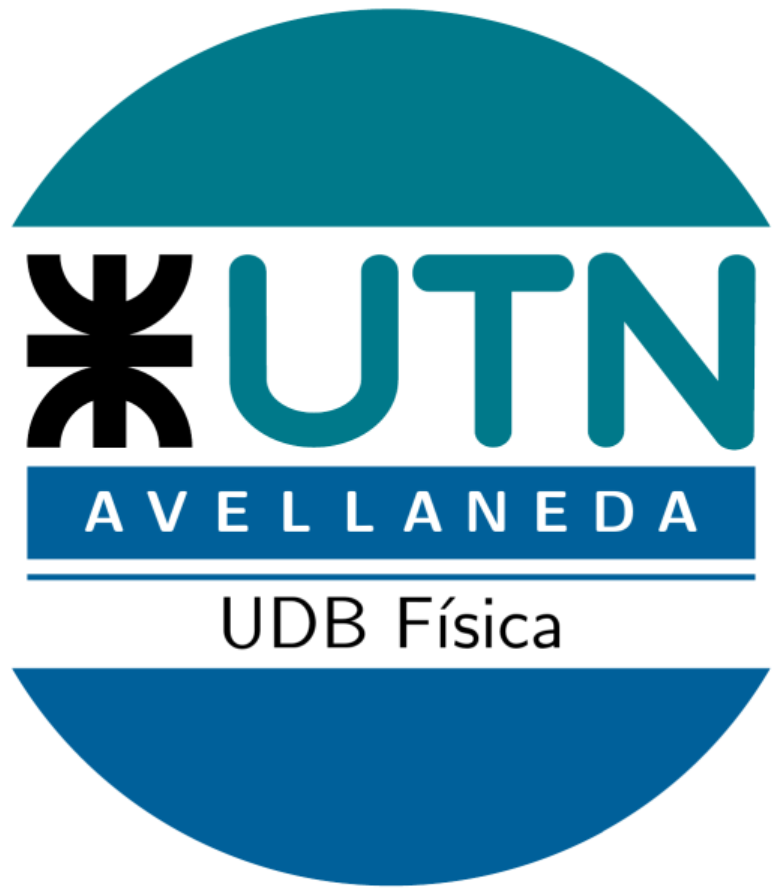</a></td><td style="border:none;"><font face="times" size=4>Física 2<br>2025<br>Electromagnetismo<br>Material de referencia</font></td></tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">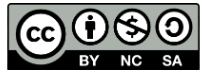</a></td><td style="border:none;"><font face="times" size=4>2025 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font></td></tr>
</table>

# Simulación de la práctica de laboratorio

---

Se aproximan las curvas equipotenciales que se debieran observar en una práctica de laboratorio usando el método de momentos [1,2].

In [43]:
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
# from scipy import integrate
from numpy import sqrt, cos, sin, arctan, log, pi, absolute
import sys

import sympy as sm
from sympy import init_printing, Eq, symbols, Symbol, integrate, Integral
init_printing(use_unicode=False, wrap_line=False)


# py.rcParams['mathtext.fontset'] = 'stix'
# py.rcParams.update({'font.size': 14})


np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
# %precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import plotEf, equipotencialesPuntuales

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget

Looking in indexes: https://test.pypi.org/simple/


## Presentación de la práctica

Completar.

<!-- <div><image src="img/c2_cilindro.png"  width="400"></div>

<div><image src="img/c2_cilindro_discretizado.png"  width="500"></div> -->


## Resolución numérica

Falta multiplicar por 2k.



In [44]:
# Parámetros del sistema y numéricos.

a = 0.05    # Lado del cuadrado (m).
V1 = 1      # Potencial en el cuadrado (V).

N = 2000     # Cantidad de segmentos (usar múltiplo de 4). 

# No modificar:
Delta = 4*a/N   # Longitud de cada segmento. 

In [45]:
# Preparo la matriz para ir concatenando filas por cada valor de i.
A = np.array([]).reshape(0,N)

In [46]:
# i en el segmento x = 0

# j en el segmento x = 0
def Aij1(i, j):
    ya = (j-1)*Delta 
    yb = ya + Delta 
    # result = integrate.quad(lambda y: log(absolute(y-(2*i-1)*Delta/2)), ya, yb)
    # return integrate(sm.log(sm.Abs(y-(2*i-1)*Delta/2)),(y,(j-1)*Delta,j*Delta))
    r = Delta*(
        (j-i+1/2)*log(absolute(j-i+1/2)*Delta)
        -(j-i-1/2)*log(absolute(j-i-1/2)*Delta)-1
        )
    return r

# j en el segmento y = a
def Aij2(i, j):
    xa = (j-N/4-1)*Delta 
    xb = xa + Delta 
    t = a-(2*i-1)*Delta/2
    ra = 0.5*xa*(log(xa**2+ t**2)-2) + arctan(xa/t) * t
    rb = 0.5*xb*(log(xb**2+ t**2)-2) + arctan(xb/t) * t
    return rb-ra

# j en el segmento x = a
def Aij3(i, j):
    ya = (3*N/4-j)*Delta 
    yb = ya + Delta 
    t = (2*i-1)*Delta/2
    ra = 0.5*(ya-t)*log(a**2 + (t-ya)**2) + a*arctan((t-ya)/a) -ya
    rb = 0.5*(yb-t)*log(a**2 + (t-yb)**2) + a*arctan((t-yb)/a) -yb
    return rb-ra

# j en el segmento y = 0
def Aij4(i, j):
    xa = (N-j)*Delta 
    xb = xa + Delta 
    t = (2*i-1)*Delta/2
    ra = 0.5*xa*(log(xa**2 + t**2)-2) + arctan(xa/t) * t
    rb = 0.5*xb*(log(xb**2 + t**2)-2) + arctan(xb/t) * t

    return rb-ra

for i in np.arange(N/4):
# for i in np.arange(1):
    row = np.zeros(N)
    # Las formulas consideran que i y j comienzan en 1,
    # mientras que Python comienza en 0.
    for j in range(int(N/4)):
        row[j] = Aij1(i+1,j+1)
    for j in range(int(N/4), int(2*N/4)):
        row[j] = Aij2(i+1,j+1)
    for j in range(int(2*N/4),int(3*N/4)):
        row[j] = Aij3(i+1,j+1)
    for j in range(int(3*N/4), N):
        row[j] = Aij4(i+1,j+1)
    A = np.concatenate([A, row.reshape(1,N)], axis=0)



In [47]:
# i en el segmento y = a

# j en el segmento x = 0
def Aij1(xi, j):
    ya = (j-1)*Delta 
    yb = ya + Delta 
    ra = 0.5*(ya-a)*log((ya-a)**2+xi**2)-xi*arctan((a-ya)/xi)-ya
    rb = 0.5*(yb-a)*log((yb-a)**2+xi**2)-xi*arctan((a-yb)/xi)-yb
    return rb-ra

# j en el segmento y = a
def Aij2(xi, j):
    xa = (j-N/4-1)*Delta 
    xb = xa + Delta 
    ra = (xa-xi)*log(absolute(xa-xi))-xa
    rb = (xb-xi)*log(absolute(xb-xi))-xb
    return rb-ra

# j en el segmento x = a
def Aij3(xi, j):
    ya = a-(j-N/2)*Delta 
    yb = ya + Delta 
    ra = 0.5*(ya-a)*log((ya-a)**2+(a-xi)**2)-(a-xi)*arctan((a-ya)/(a-xi))-ya
    rb = 0.5*(yb-a)*log((yb-a)**2+(a-xi)**2)-(a-xi)*arctan((a-yb)/(a-xi))-yb
    return rb-ra

# j en el segmento y = 0
def Aij4(xi, j):
    xa = a - (j-3*N/4)*Delta 
    xb = xa + Delta 
    ra = 0.5*(xa-xi)*log(a**2+(xi-xa)**2)-a*arctan((xi-xa)/a)-xa
    rb = 0.5*(xb-xi)*log(a**2+(xi-xb)**2)-a*arctan((xi-xb)/a)-xb
    return rb-ra

for i in np.arange(N/4):
    row = np.zeros(N)
    # Las formulas consideran que i y j comienzan en 1,
    # mientras que Python comienza en 0.
    xi = (2*(i+1-N/4)-1)*Delta/2
    for j in range(int(N/4)):
        row[j] = Aij1(xi,j+1)
    for j in range(int(N/4), int(2*N/4)):
        row[j] = Aij2(xi,j+1)
    for j in range(int(2*N/4),int(3*N/4)):
        row[j] = Aij3(xi,j+1)
    for j in range(int(3*N/4), N):
        row[j] = Aij4(xi,j+1)
    A = np.concatenate([A, row.reshape(1,N)], axis=0)

In [48]:
# i en el segmento x = a

# j en el segmento x = 0
def Aij1(yi, j):
    ya = (j-1)*Delta 
    yb = ya + Delta 
    ra = 0.5*(ya-yi)*log(a**2+(yi-ya)**2)-a*arctan((yi-ya)/a)-ya
    rb = 0.5*(yb-yi)*log(a**2+(yi-yb)**2)-a*arctan((yi-yb)/a)-yb
    return rb-ra

# j en el segmento y = a
def Aij2(yi, j):
    xa = (j-N/4-1)*Delta 
    xb = xa + Delta 
    ra = 0.5*(xa-a)*log((a-xa)**2+(a-yi)**2)-(a-yi)*arctan((a-xa)/(a-yi))-xa
    rb = 0.5*(xb-a)*log((a-xb)**2+(a-yi)**2)-(a-yi)*arctan((a-xb)/(a-yi))-xb
    return rb-ra

# j en el segmento x = a
def Aij3(yi, j):
    ya = a-(j-N/2)*Delta 
    yb = ya + Delta 
    ra = (ya-yi)*log(absolute(ya-yi))-ya
    rb = (yb-yi)*log(absolute(yb-yi))-yb
    return rb-ra

# j en el segmento y = 0
def Aij4(yi, j):
    xa = a - (j-3*N/4)*Delta 
    xb = xa + Delta 
    ra = 0.5*(xa-a)*log((a-xa)**2+yi**2)-yi**arctan((a-xa)/yi)-xa
    rb = 0.5*(xb-a)*log((a-xb)**2+yi**2)-yi**arctan((a-xb)/yi)-xb
    return rb-ra

for i in np.arange(N/4):
    row = np.zeros(N)
    # Las formulas consideran que i y j comienzan en 1,
    # mientras que Python comienza en 0.
    yi = a-(i+1-N/2-1/2)*Delta
    for j in range(int(N/4)):
        row[j] = Aij1(yi,j+1)
    for j in range(int(N/4), int(2*N/4)):
        row[j] = Aij2(yi,j+1)
    for j in range(int(2*N/4),int(3*N/4)):
        row[j] = Aij3(yi,j+1)
    for j in range(int(3*N/4), N):
        row[j] = Aij4(yi,j+1)
    A = np.concatenate([A, row.reshape(1,N)], axis=0)

In [49]:
# i en el segmento y = 0

# j en el segmento x = 0
def Aij1(xi, j):
    ya = (j-1)*Delta 
    yb = ya + Delta 
    ra = 0.5*ya*(log(xi**2+ya**2)-2)+xi*arctan(ya/xi)
    rb = 0.5*yb*(log(xi**2+yb**2)-2)+xi*arctan(yb/xi)
    return rb-ra

# j en el segmento y = a
def Aij2(xi, j):
    xa = (j-N/4-1)*Delta 
    xb = xa + Delta 
    ra = 0.5*(xa-xi)*log(a**2+(xi-xa)**2)-a*arctan((xi-xa)/a)-xa
    rb = 0.5*(xb-xi)*log(a**2+(xi-xb)**2)-a*arctan((xi-xb)/a)-xb
    return rb-ra

# j en el segmento x = a
def Aij3(xi, j):
    ya = a-(j-N/2)*Delta 
    yb = ya + Delta 
    ra = 0.5*ya*(log((a-xi)**2+ya**2)-2)+(a-xi)*arctan(ya/(a-xi))
    rb = 0.5*yb*(log((a-xi)**2+yb**2)-2)+(a-xi)*arctan(yb/(a-xi))
    return rb-ra

# j en el segmento y = 0
def Aij4(xi, j):
    xa = a - (j-3*N/4)*Delta 
    xb = xa + Delta 
    ra = (xa-xi)*log(absolute(xa-xi))-xa
    rb = (xb-xi)*log(absolute(xb-xi))-xb
    return rb-ra

for i in np.arange(N/4):
    row = np.zeros(N)
    # Las formulas consideran que i y j comienzan en 1,
    # mientras que Python comienza en 0.
    xi = a-(i+1-3*N/4-1/2)*Delta
    for j in range(int(N/4)):
        row[j] = Aij1(xi,j+1)
    for j in range(int(N/4), int(2*N/4)):
        row[j] = Aij2(xi,j+1)
    for j in range(int(2*N/4),int(3*N/4)):
        row[j] = Aij3(xi,j+1)
    for j in range(int(3*N/4), N):
        row[j] = Aij4(xi,j+1)
    A = np.concatenate([A, row.reshape(1,N)], axis=0)

In [50]:
A.shape

In [51]:
# Faltaba multiplicar por 2k.
A = 2*9E9*A 

In [52]:
B = np.ones(N)*V1
q = np.linalg.solve(A, B)

# Check that the solution is correct:
np.allclose(np.dot(A, q), B)

True

In [53]:
# Se arma la lista de cargas:
i = np.array(np.arange(1,int(N/4)+1))

x = np.zeros(int(N/4))
xx = (2*i-1)*Delta/2
x = np.concatenate([x,xx])
xx = np.ones(int(N/4))*a
x = np.concatenate([x,xx])
xx = a-(i-1/2)*Delta
x = np.concatenate([x,xx])

y = (2*i-1)*Delta/2
yy = np.ones(int(N/4))*a
y = np.concatenate([y,yy])
yy = a-(i-1/2)*Delta
y = np.concatenate([y,yy])
yy = np.zeros(int(N/4))
y = np.concatenate([y,yy])

x = x.reshape(1,N)
y = y.reshape(1,N)
z = np.zeros(N).reshape(1,N)

Q = np.concatenate([q.reshape(1,N),x,y,z], axis=0)
Q = np.transpose(Q)

In [54]:
Nx = 200
Ny = 200
x = np.linspace(-0.10,0.20,Nx)        # x variables in 1D
y = np.linspace(-0.10,0.20,Ny)        # y variable in 1D
X,Y = np.meshgrid(x,y)          # 2D meshgrid


In [57]:
def Efield2D(x, y, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1],
        [q2,x2,y2],
        ...
        [qN,xN,yN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    Ei,Ej= 0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2)**(3/2)
        Ei = Ei + k * qi[0] * (x - qi[1]) / r
        Ej = Ej + k * qi[0] * (y - qi[2]) / r

    return Ei, Ej

def region_conductor(x,y):
    regionx = np.piecewise(X, [(X > 0) & (X < 0.05), ], [0, 1])
    regiony = np.piecewise(Y, [(Y > 0) & (Y < 0.05), ], [0, 1])
    region = regionx + regiony
    region = np.piecewise(region, [region > 0], [1, 0])

    return region

# Defining custom plotting functions
def my_contourf(x,y,F,ttl,clrmp = 'inferno'):
    cnt = py.contourf(x,y,F,41,cmap = clrmp)
    
    # Antialiasing block for exporting figure to pdf later
    for c in cnt.collections:
        c.set_edgecolor("face")
    
    cbar = py.colorbar()
    # py.xlabel(r'$x$',fontsize=26); py.ylabel(r'$y$',fontsize=26); 
    py.xlabel(r'$x$'); py.ylabel(r'$y$'); 
    # py.title(ttl)
    # cbar.set_label(ttl,fontsize=26)
    cbar.set_label(ttl)
    # py.xlim([x[0],x[-1]])
    # py.ylim([y[0],y[-1]])
    return 0


/tmp/ipykernel_20338/4256922833.py:35: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cnt.collections:


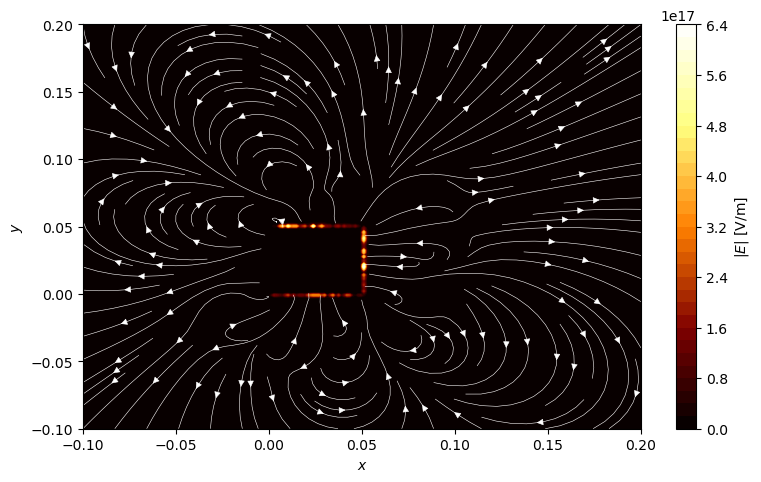

In [58]:
region = region_conductor(X,Y)
Ei, Ej = Efield2D(X,Y,Q)

Ei = Ei * region 
Ej = Ej * region 

Emod = np.sqrt(Ei**2 + Ej**2)

# py.figure(figsize = (12,7))
py.figure(figsize = (9,5.25))
my_contourf(X,Y,Emod,r'$|E|$ [V/m]','afmhot')
py.streamplot(X,Y,Ei,Ej,color = 'w',density = 1.2, linewidth = 0.4)


In [59]:
Q

array([[-1.17825844e-01,  0.00000000e+00,  5.00000000e-05,
         0.00000000e+00],
       [ 7.38200101e-02,  0.00000000e+00,  1.50000000e-04,
         0.00000000e+00],
       [ 4.49956639e-02,  0.00000000e+00,  2.50000000e-04,
         0.00000000e+00],
       ...,
       [ 1.04378695e+00,  2.50000000e-04,  0.00000000e+00,
         0.00000000e+00],
       [-7.77171578e-01,  1.50000000e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 7.63658358e-01,  5.00000000e-05,  0.00000000e+00,
         0.00000000e+00]])

## Referencias

Revisar.

<a id='sadiku'>[1]</a> Sadiku, M.N.O. (2018). $\emph{Computational Electromagnetics with MATLAB}$, (4ta ed.). CRC Press. https://doi.org/10.1201/9781315151250  
<a id='gibson'>[2]</a> Gibson, W.C. (2021). $\emph{The Method of Moments in Electromagnetics}$, (3ra ed.). Chapman and Hall/CRC. https://doi.org/10.1201/9780429355509  


<!-- pp. 123-157 -->
